In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from nltk.tokenize import word_tokenize

import random

import re
import nltk

from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

2024-01-02 23:21:50.496353: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-02 23:21:50.537481: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 23:21:50.768746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 23:21:50.768866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 23:21:50.811748: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
df = pd.read_json("intents.json")

In [3]:
df_input = df.copy(deep= True)
df_input = pd.DataFrame(df_input['intents'].tolist(), index = df_input.index)
df_input.head()

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."


In [4]:
df = pd.DataFrame(df['intents'].tolist(), index = df.index)

In [5]:
df.head()

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."


In [6]:
df = df.explode('patterns').explode('responses')

In [7]:
df.head()

,tag,patterns,responses
0,greeting,Hi,Hello there. Tell me how are you feeling today?
0,greeting,Hi,Hi there. What brings you here today?
0,greeting,Hi,Hi there. How are you feeling today?
0,greeting,Hi,Great to see you. How do you feel currently?
0,greeting,Hi,Hello there. Glad to see you're back. What's g...


In [11]:
df.tag.unique(), df.tag.nunique()

(array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
        'thanks', 'no-response', 'neutral-response', 'about', 'skill',
        'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
        'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
        'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
        'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
        'location', 'something-else', 'friends', 'ask', 'problem',
        'no-approach', 'learn-more', 'user-agree', 'meditation',
        'user-meditation', 'pandora-useful', 'user-advice',
        'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
        'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
        'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
        'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
        'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
        'fact-28

In [12]:
len(df)

661

In [8]:
df.to_csv('./df_intents.csv', index = False)

Unique Values and Counts in 'tag' column:
tag
casual              66
greeting            60
about               48
default             40
goodbye             32
                    ..
neutral-response     1
skill                1
pandora-useful       1
morning              1
fact-11              1
Name: count, Length: 80, dtype: int64


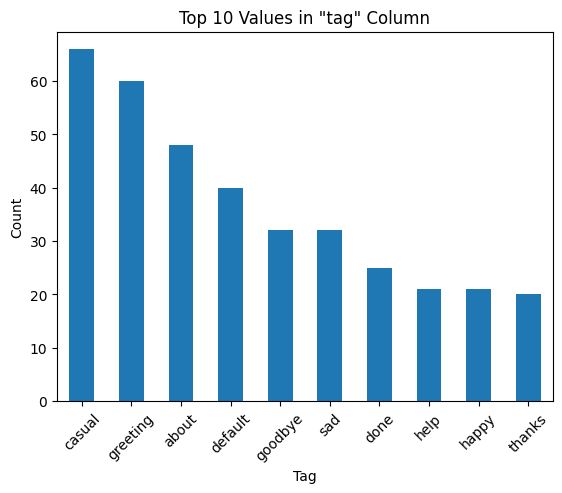

In [8]:
#plotting bar charts for unique values in tag column

unique_tags = df['tag'].unique()
unique_tag_counts = df['tag'].value_counts()
print("Unique Values and Counts in 'tag' column:")
print(unique_tag_counts)

top_n = 10 
unique_tag_counts.head(top_n).plot(kind='bar', rot=45) 
plt.title(f'Top {top_n} Values in "tag" Column')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

In [9]:
#model fitting training and evaluation

max_seq_length = 30 #for padding 

# Tokenize patterns and responses
tokenizer_patterns = Tokenizer()
tokenizer_patterns.fit_on_texts(df['patterns'])
patterns_seq = tokenizer_patterns.texts_to_sequences(df['patterns'])
patterns_seq_padded = pad_sequences(patterns_seq, maxlen=max_seq_length, padding='post')

tokenizer_responses = Tokenizer()
tokenizer_responses.fit_on_texts(df['responses'])
responses_seq = tokenizer_responses.texts_to_sequences(df['responses'])
responses_seq_padded = pad_sequences(responses_seq, maxlen=max_seq_length, padding='post')

# Split the data into training and testing sets
X_train_patterns, X_test_patterns, y_train, y_test = train_test_split(patterns_seq_padded, df['tag'], test_size=0.2, random_state=42)
X_train_responses, X_test_responses = train_test_split(responses_seq_padded, test_size=0.2, random_state=42)

#Intent Prediction Model
intent_input = Input(shape=(max_seq_length,))
embedding_layer = Embedding(input_dim=len(tokenizer_patterns.word_index) + 1, output_dim=50)(intent_input)
bidirectional_lstm = Bidirectional(LSTM(64))(embedding_layer)
intent_output = Dense(units=len(set(df['tag'])), activation='softmax')(bidirectional_lstm)

intent_model = Model(inputs=intent_input, outputs=intent_output)
intent_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# label encoder to convert  y_train to numerical labels
label_encoder = LabelEncoder()
y_train_numerical_intent = label_encoder.fit_transform(y_train)

# One-hot encode y_train for intent model and reshaping it 
intent_labels_train = to_categorical(y_train_numerical_intent, num_classes=len(set(df['tag'])))
intent_labels_train = intent_labels_train.reshape(intent_labels_train.shape[0], intent_labels_train.shape[1])

# intent model fitting 
history_intent = intent_model.fit(X_train_patterns, intent_labels_train, epochs=10, batch_size=1, validation_split=0.2)

# response generation bidirectional lstm model
response_input = Input(shape=(max_seq_length,))
response_embedding_layer = Embedding(input_dim=len(tokenizer_responses.word_index) + 1, output_dim=50)(response_input)
bidirectional_lstm_response = Bidirectional(LSTM(64, return_sequences=True))(response_embedding_layer)
response_output = Dense(len(tokenizer_responses.word_index) + 1, activation='softmax')(bidirectional_lstm_response)

response_model = Model(inputs=response_input, outputs=response_output)
response_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#label encoding y_train
y_train_numerical_response = label_encoder.transform(y_train)

# One-hot encode y_train for response model
response_labels_train = to_categorical(responses_seq_padded, num_classes=len(tokenizer_responses.word_index) + 1)

print(X_train_responses.shape)
print(response_labels_train.shape)


# Fiting the response model
history_response = response_model.fit(X_train_responses, response_labels_train, epochs=10, batch_size=1, validation_split=0.2)



2023-12-25 00:43:08.277591: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 00:43:08.400189: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 3.7519 - accuracy: 0.1161 - val_loss: 3.4771 - val_accuracy: 0.1415
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 2.9039 - accuracy: 0.2607 - val_loss: 2.9112 - val_accuracy: 0.2736
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 2.1332 - accuracy: 0.4668 - val_loss: 2.2798 - val_accuracy: 0.4340
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 1.5231 - accuracy: 0.6422 - val_loss: 1.8176 - val_accuracy: 0.6132
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 1.0754 - accuracy: 0.7749 - val_loss: 1.5120 - val_accuracy: 0.7170
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.7662 - accuracy: 0.8389 - val_loss: 1.2304 - val_accuracy: 0.7925
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.6119 - accuracy: 0.8507 - val_loss: 1.1925 - val_accuracy: 0.7830
Epoch 

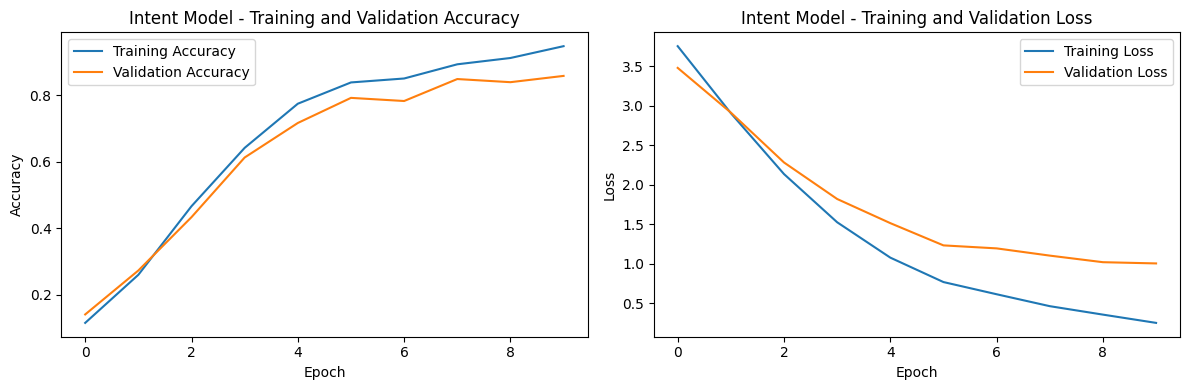

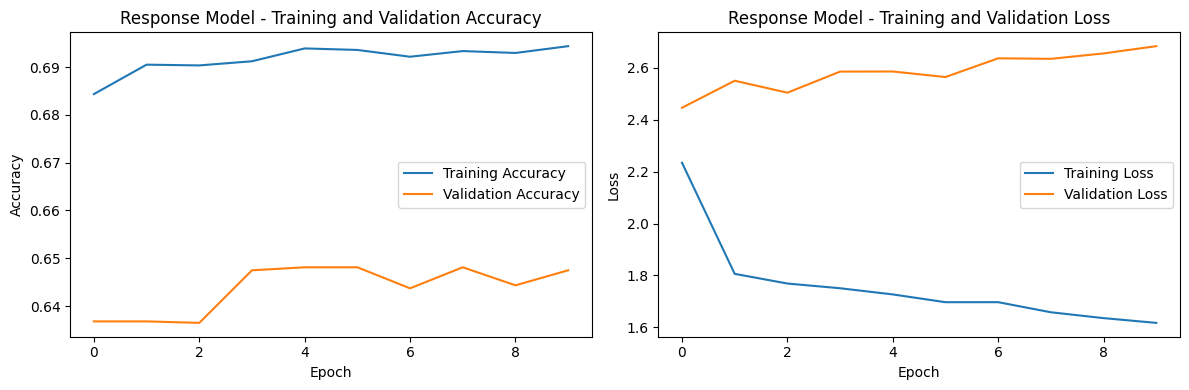

In [10]:
# Plotting Accuracy and Loss for Intent Model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_intent.history['accuracy'], label='Training Accuracy')
plt.plot(history_intent.history['val_accuracy'], label='Validation Accuracy')
plt.title('Intent Model - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_intent.history['loss'], label='Training Loss')
plt.plot(history_intent.history['val_loss'], label='Validation Loss')
plt.title('Intent Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting Accuracy and Loss for Response Model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_response.history['accuracy'], label='Training Accuracy')
plt.plot(history_response.history['val_accuracy'], label='Validation Accuracy')
plt.title('Response Model - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_response.history['loss'], label='Training Loss')
plt.plot(history_response.history['val_loss'], label='Validation Loss')
plt.title('Response Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
df_input.to_csv('df_input.csv', index=False)

In [12]:
def get_random_response(tag):
    tag 
    tag_data = df_input[df_input['tag'] == tag]
    if not tag_data.empty:
        responses_list = tag_data['responses'].iloc[0]
        return random.choice(responses_list)
    else:
        return "Tag not found"

while True:
    new_sentence = str(input("Input Question: "))
    if new_sentence == "exit":
        break;
    # Tokenize a new sentence for intent prediction
    new_sentence_seq = tokenizer_patterns.texts_to_sequences([new_sentence])
    new_sentence_padded = pad_sequences(new_sentence_seq, maxlen=max_seq_length, padding='post')

    # Predict the intent
    intent_prediction = intent_model.predict(new_sentence_padded)
    predicted_intent_index = np.argmax(intent_prediction)
    predicted_intent = label_encoder.classes_[predicted_intent_index]
    print(f"Predicted Mood: {predicted_intent}")

    # Tokenize the new sentence for response generation and predict the response 
    #this is not very accurate so instead we are using a random response model 
    #new_response_input = tokenizer_responses.texts_to_sequences([new_sentence])
    #new_response_input_padded = pad_sequences(new_response_input, maxlen=max_seq_length, padding='post')
    #response_prediction = response_model.predict(new_response_input_padded)
    #predicted_response_index = np.argmax(response_prediction, axis=-1)
    #predicted_response = " ".join([tokenizer_responses.index_word[i] for i in predicted_response_index[0] if i != 0])


    
    predicted_response = get_random_response(predicted_intent)
    print(f"Predicted Response: {predicted_response}")
    

1/1 [==============================] - 0s 310ms/step
Predicted Mood: casual
Predicted Response: I'm listening. Please go on.
1/1 [==============================] - 0s 12ms/step
Predicted Mood: casual
Predicted Response: Tell me more
1/1 [==============================] - 0s 12ms/step
Predicted Mood: casual
Predicted Response: Can you elaborate on that?


In [13]:
while True:
    new_sentence = str(input("Input Question: "))
    if new_sentence == "exit":
        break;
    # Tokenize a new sentence for intent prediction
    new_sentence_seq = tokenizer_patterns.texts_to_sequences([new_sentence])
    new_sentence_padded = pad_sequences(new_sentence_seq, maxlen=max_seq_length, padding='post')

    # # Predict the intent
    # intent_prediction = intent_model.predict(new_sentence_padded)
    # predicted_intent_index = np.argmax(intent_prediction)
    # predicted_intent = label_encoder.classes_[predicted_intent_index]
    # print(f"Predicted Mood: {predicted_intent}")

    # Tokenize the new sentence for response generation and predict the response 
    # this is not very accurate so instead we are using a random response model 
    new_response_input = tokenizer_responses.texts_to_sequences([new_sentence])
    new_response_input_padded = pad_sequences(new_response_input, maxlen=max_seq_length, padding='post')
    response_prediction = response_model.predict(new_response_input_padded)
    predicted_response_index = np.argmax(response_prediction, axis=-1)
    predicted_response = " ".join([tokenizer_responses.index_word[i] for i in predicted_response_index[0] if i != 0])

    
    predicted_response = get_random_response(predicted_intent)
    print(f"Predicted Response: {predicted_response}")
    

In [14]:
intent_model.save('intent_model.keras')

In [15]:
from tensorflow.keras.models import load_model

loaded_model = load_model('intent_model.keras')


In [16]:
import pickle

# Save the tokenizer_patterns object
with open('tokenizer_patterns.pkl', 'wb') as f:
    pickle.dump(tokenizer_patterns, f)


In [17]:
import pickle

# Load the tokenizer_patterns object
with open('tokenizer_patterns.pkl', 'rb') as f:
    tokenizer_patterns = pickle.load(f)


In [18]:
import pickle

# Save the label_encoder object
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [19]:
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [20]:
max_seq_length = 30

new_sentence = "I am feeling sad."

new_sentence_seq = tokenizer_patterns.texts_to_sequences([new_sentence])
new_sentence_padded = pad_sequences(new_sentence_seq, maxlen=max_seq_length, padding='post')

# Predict the intent
intent_prediction = loaded_model.predict(new_sentence_padded)
predicted_intent_index = np.argmax(intent_prediction)
predicted_intent = label_encoder.classes_[predicted_intent_index]
print(f"Predicted Mood: {predicted_intent}")

1/1 [==============================] - 0s 298ms/step
Predicted Mood: sad
